# Trabalho da Disciplina de Processamento Digital de Imagens 4.2:

OBJETIVO: O objetivo desta atividade é aplicar as técnicas aprendidas na disciplina de Introdução a PDI no problema de segmentação e contagem automática de objetos. Para isto, serão dadas algumas imagens de entrada, que deverão ser analisadas.

# <font style="color:green">Documentações:</font>

* Numpy: https://numpy.org/doc/stable/
* Matplotlib: https://matplotlib.org/3.5.1/index.html
* Opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html;

##  Letra A:

<b>Objetivo</b>: Analisar a imagem de entrada com o objetivo de aplicar algum pré-processamento para redução de ruído. Utilize livremente as funções existentes na OpenCV.

1. IMPORTANDO BIBLIOTECAS:

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

2. LENDO IMAGENS:

In [8]:
img = cv.imread('test_images/' + 'bolhas.png')[:,:,::-1]
img2 = cv.imread('test_images/' + 'coins-01.png')[:,:,::-1]
img3 = cv.imread('test_images/' + 'rice.png')[:,:,::-1]

3. REMOVENDO O RUÍDO ATRAVÉS DO FILTRO GAUSSIANO (NOTE QUE ALGUMAS IMAGENS TEM KERNEL ESPECÍFICO CONFORME SU DIMENSÃO):

In [9]:
gray_img = cv.cvtColor(img, cv.COLOR_RGBA2GRAY)
gaussianBlur_img = cv.GaussianBlur(gray_img, [7, 7], 0)

gray_img2 = cv.cvtColor(img2, cv.COLOR_RGBA2GRAY)
gaussianBlur_img2 = cv.GaussianBlur(gray_img2, [7, 7], 0)

gray_img3 = cv.cvtColor(img3, cv.COLOR_RGBA2GRAY)
gaussianBlur_img3 = cv.GaussianBlur(gray_img3, [3, 3], 0)

4. IMPRESSÃO DOS RESULTADOS:

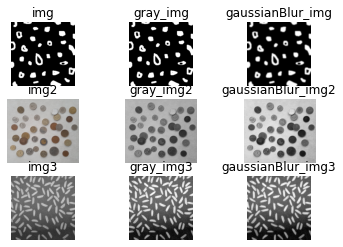

In [11]:
plt.subplot(3, 3, 1), plt.title('img'), plt.axis('OFF'), plt.imshow(img)
plt.subplot(3, 3, 2), plt.title('gray_img'), plt.axis('OFF'), plt.imshow(gray_img, cmap='gray')
plt.subplot(3, 3, 3), plt.title('gaussianBlur_img'), plt.axis('OFF'), plt.imshow(gaussianBlur_img, cmap='gray')

plt.subplot(3, 3, 4), plt.title('img2'), plt.axis('OFF'), plt.imshow(img2)
plt.subplot(3, 3, 5), plt.title('gray_img2'), plt.axis('OFF'), plt.imshow(gray_img2, cmap='gray')
plt.subplot(3, 3, 6), plt.title('gaussianBlur_img2'), plt.axis('OFF'), plt.imshow(gaussianBlur_img2, cmap='gray')

plt.subplot(3, 3, 7), plt.title('img3'), plt.axis('OFF'), plt.imshow(img3)
plt.subplot(3, 3, 8), plt.title('gray_img3'), plt.axis('OFF'), plt.imshow(gray_img3, cmap='gray')
plt.subplot(3, 3, 9), plt.title('gaussianBlur_img3'), plt.axis('OFF'), plt.imshow(gaussianBlur_img3, cmap='gray')

plt.show()

## Letra B:

<b>Objetivo:</b> Extrair o conteúdo do fundo removendo-o do processo (usar técnicas de limiarização, extração de bordas e/ou operadores morfológicos para melhorar o  resultado obtido). Utilize livremente as funções existentes na OpenCV. Atente-se ao fato de que, algumas imagens podem não possuir uma uniformidade nas cores do fundo ou terem espaços de cores diferentes. Seu código deverá se adaptar automaticamente, ou ser genérico o suficiente para tratar todos os casos.

<b>Escolha</b>: O algórtimo será genérico para que seja capaz de tratar ambos os exemplos por questões de simplicidade e bons resultados.

Desta forma, criamos uma função chamada remove_background. Essa função será responsável em remover o fundo da imagem de forma
genérica, onde tem-se if's específicos que tratará cada caso. Observe-se que dependendo do tamanho e da quantidade de objetos
que a imagem tem, maior será as linhas de código.

In [14]:
def remove_background(img, gaussianBlur_img, what_img):
    mask_name = 0
    mask_img = []
    final_img = []
    
    # PARA O CASO DA PRIMEIRA IMAGEM (JÁ LIMIARIZADA E PRECISA APENAS DO MÉTODO CLOSING)
    if(what_img == 1):
        kernel = cv.getStructuringElement(cv.MORPH_RECT, [5, 1])
        erode_img = cv.erode(img, kernel, iterations=1)
        
        kernel_2 = cv.getStructuringElement(cv.MORPH_CROSS, [25, 25])
        closing_Eimg = cv.morphologyEx(erode_img, cv.MORPH_CLOSE, kernel_2)
        
        kernel_3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, [7, 7])
        erode_CEimg = cv.erode(closing_Eimg, kernel_3, iterations=1)
 
        bitwise_img = cv.bitwise_or(img, erode_CEimg, mask=None)
        
        kernel_4 = cv.getStructuringElement(cv.MORPH_RECT, [1, 8])
        
        mask_name = "bolhas_mask.png"
        final_img = cv.morphologyEx(bitwise_img, cv.MORPH_CLOSE, kernel_4)
        mask_img = final_img.copy()
                
        plt.figure('bolhas.png')
        
        plt.subplot(2, 3, 1), plt.title('img'), plt.axis('OFF'), plt.plot(), plt.imshow(img, cmap='gray')
        plt.subplot(2, 3, 2), plt.title('erode_img'), plt.axis('OFF'), plt.plot(), plt.imshow(erode_img, cmap='gray')
        plt.subplot(2, 3, 3), plt.title('closing_Eimg'), plt.axis('OFF'), plt.plot(), plt.imshow(closing_Eimg, cmap='gray')
        
        plt.subplot(2, 3, 4), plt.title('erode_CEimg'), plt.axis('OFF'), plt.plot(), plt.imshow(erode_CEimg, cmap='gray')
        plt.subplot(2, 3, 5), plt.title('bitwise_img'), plt.axis('OFF'), plt.plot(), plt.imshow(bitwise_img, cmap='gray')
        plt.subplot(2, 3, 6), plt.title('final_image'), plt.axis('OFF'), plt.plot(), plt.imshow(final_img, cmap='gray')
        
        plt.show()      
    
    # ... SEGUNDA IMAGEM (USO DO CANNY PARA DETECTAR AS BORDAS DA MOEDA BRANCA, OP. MORFOLÓGICOS E BITWISE)
    elif(what_img == 2):
        canny_img = cv.Canny(gaussianBlur_img, 100, 0)
        threshold, thresh_img = cv.threshold(gaussianBlur_img, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)
        bitwise_img = cv.bitwise_xor(canny_img, thresh_img, mask=None)
        
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [19, 19])
        closing_BCimg = cv.morphologyEx(bitwise_img, cv.MORPH_CLOSE, kernel)
        
        kernel_2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, [75, 75])
        opening_Cimg = cv.morphologyEx(closing_BCimg, cv.MORPH_OPEN, kernel_2)
        
        bitwise_TOimg = cv.bitwise_xor(thresh_img, opening_Cimg, mask=None)
        bitwise_OBimg = cv.bitwise_or(opening_Cimg, bitwise_TOimg, mask=None)
    
        mask_name = "coins-01_mask.png" 
        mask_img = bitwise_OBimg.copy()
        final_img = cv.bitwise_and(img, img, mask=bitwise_OBimg)
        
        plt.figure('coins-01.png')
        
        plt.subplot(3, 3, 1), plt.title('gaussianBlur_img'), plt.axis('OFF'), plt.plot(), plt.imshow(gaussianBlur_img, cmap='gray')
        plt.subplot(3, 3, 2), plt.title('canny_img'), plt.axis('OFF'), plt.plot(), plt.imshow(canny_img, cmap='gray')
        plt.subplot(3, 3, 3), plt.title('thresh_img'), plt.axis('OFF'), plt.plot(), plt.imshow(thresh_img, cmap='gray')
        
        plt.subplot(3, 3, 4), plt.title('bitwise_img'), plt.axis('OFF'), plt.plot(), plt.imshow(bitwise_img, cmap='gray')
        plt.subplot(3, 3, 5), plt.title('closing_img'), plt.axis('OFF'), plt.plot(), plt.imshow(closing_BCimg, cmap='gray')
        plt.subplot(3, 3, 6), plt.title('opening_img'), plt.axis('OFF'), plt.plot(), plt.imshow(opening_Cimg, cmap='gray')
        
        plt.subplot(3, 3, 7), plt.title('bitwise_TOimg'), plt.axis('OFF'), plt.plot(), plt.imshow(bitwise_TOimg, cmap='gray')
        plt.subplot(3, 3, 8), plt.title('bitwise_OBimg'), plt.axis('OFF'), plt.plot(), plt.imshow(bitwise_OBimg, cmap='gray')
        plt.subplot(3, 3, 9), plt.title('final_img'), plt.axis('OFF'), plt.plot(), plt.imshow(final_img, cmap='gray')
        
        plt.show()
    # ... TERCEIRA IMAGEM (USANDO LIMIAR ADAPTATIVO E O MÉTODO OPENING)
    elif(what_img == 3):
        thresh_img = cv.adaptiveThreshold(gaussianBlur_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 3)
        
        kernel = cv.getStructuringElement(cv.MORPH_CROSS, [3, 3])
        opening_img = cv.morphologyEx(thresh_img, cv.MORPH_OPEN, kernel)
        
        mask_name = "rice_mask.png"
        mask_img = opening_img.copy()
        final_img = cv.bitwise_and(img, img, mask=opening_img)
        
        plt.figure('rice.png')
        
        plt.subplot(2, 2, 1), plt.title('gaussianBlur_img'), plt.axis('OFF'), plt.plot(), plt.imshow(gaussianBlur_img, cmap='gray')
        plt.subplot(2, 2, 2), plt.title('thresh_img'), plt.axis('OFF'), plt.plot(), plt.imshow(thresh_img, cmap='gray')
        
        plt.subplot(2, 2, 3), plt.title('opening_img'), plt.axis('OFF'), plt.plot(), plt.imshow(opening_img, cmap='gray')
        plt.subplot(2, 2, 4), plt.title('final_img'), plt.axis('OFF'), plt.plot(), plt.imshow(final_img, cmap='gray')
        
        plt.show()
    else:
        print('ERROR - RETURNING FUNCTION...')
        return
    
    cv.imwrite('output_images/%s' %(mask_name), mask_img)
    return final_img

IMPRESSÃO DOS RESULTADOS:
    
1 - Para o primeiro caso, o objetivo no geral foi tampar os buracos para que não haja problemas na hora de fazer a rotulagem.
Ao todo foram seis alterações na imagem.

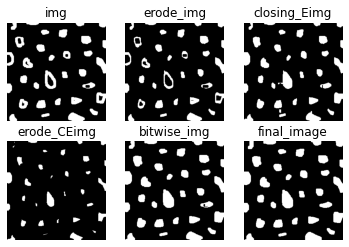

In [22]:
noBackground_img = remove_background(img, False, 1)
noBackground_img = cv.cvtColor(noBackground_img, cv.COLOR_RGBA2BGRA)

2 - Já o segundo caso apresentou-se bastante complexo e difícil de remover o fundo. Não era possível realizar de imediato,
um limiar na imagem pois a moeda branca contida na imagem não aparecia. Desta forma foi pensando em realizar ao mesmo tempo
o limiar e o canny da imagem (detectar bordas). Depois de ter mesclado pelo bitwise XOR as duas imagens, foi fundamental
o uso do operador morf. closing para tampar os buracos, em seguida utiliza-se o opening para retirar as "pontes" formadas
entre as moedadas e as 3 últimas imagens executadas foi só por questão de aperfeiçoamento.

Conclusão: Mesmo que o fundo foi removido de forma extrema, algumas moedas ainda ficaram grudadas.

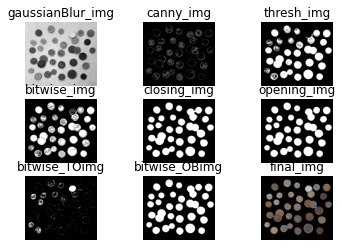

In [23]:
noBackground_img2 = remove_background(img2, gaussianBlur_img2, 2)
noBackground_img2 = cv.cvtColor(noBackground_img2, cv.COLOR_RGB2BGR)

3 - O terceiro caso de fato foi o mais tranquilo de tratar. Basta extrair o limiar da imagem e realizar uma operação de 
opening para evitar que alguns graõs fiquem colados.

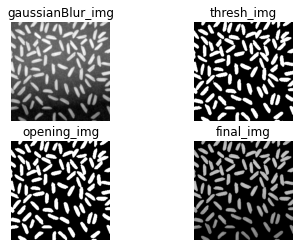

In [24]:
noBackground_img3 = remove_background(img3, gaussianBlur_img3, 3)
noBackground_img3 = cv.cvtColor(noBackground_img3, cv.COLOR_RGBA2BGRA)

## Letra C

<b>Objetivo</b>: Implementar um algoritmo de segmentação baseado na técnica de inundação (usando um algoritmo de busca em largura, por exemplo) para atribuir um número inteiro único a cada objeto conectado presente na imagem (pode-se utilizar vizinhança-4 apenas). Por exemplo, o primeiro objeto fortemente conectado encontrado terá o número 1, o segundo o número 2, e assim por diante.

<b>Escolha:</b> Algorítmo de rotulação de objetos conectados por busca e largura utilizando a vizinhança-4.

Funções:
    
- def is_bound_pixel(img, i, j): Fica responsável em analisar se determinada adjacência dos pixels estão no limite da imagem
(que não se encontra fora do domínio em questão). Nesta função a 3 if's, sendo 2 que retorna  um valor em booleano para falso
quando realmente este pixel vizinho estiver fora e verdaeiro caso ele se encontra dentro da imagem.

In [31]:
# ALGORITMO DE ROTULAGEM DE COMPONENTES CONECTADOS - MÉTODO DE BUSCA POR LARGURA
# - ENTRADA:    IMAGEM LIMIARIZADA;
# - SAIDA:      IMAGEM ROTULADA;

# VERIFICA SE A VIZINHANÇA ESTÁ NO LIMITE
def is_bound_pixel(img, i, j):
    if (i < 0) or (j < 0):
        return False
    if (i > img.shape[0]-1) or (j > img.shape[1]-1):
        return False
    
    return True

- def find_neighbors(img): Encontra  os possíveis vizinhos em 4, armazenando-os em uma fila. Ao final, é
    retornado um vetor contendo os possíveis vizinhos dos pixels analisados em questão.

In [32]:
# ENCONTRA OS POSSIVEIS VIZINHOS DO PIXEL ANALISADO EM QUESTÃO
def find_neighbors(img):
    final_pixel_neighbor = np.zeros((img.shape), dtype=object)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p_up = (i-1, j)
            p_down = (i+1, j)
            p_left = (i, j-1)
            p_right = (i, j+1)
            pixel_neighbor = []

            if is_bound_pixel(img, p_up[0], p_up[1]):
                pixel_neighbor.append((p_up))
            if is_bound_pixel(img, p_down[0], p_down[1]):
                pixel_neighbor.append((p_down))
            if is_bound_pixel(img, p_left[0], p_left[1]):
                pixel_neighbor.append((p_left))
            if is_bound_pixel(img, p_right[0], p_right[1]):
                pixel_neighbor.append((p_right))
                
            final_pixel_neighbor[i, j] = pixel_neighbor
    
    return final_pixel_neighbor

- def labeling_breadthSearch(thresh_img): Basicamente o cérebro do algóritmo. Esta função é responsável em fazer todo o processo
de rotulagem dos objetos da imagem com auxílio das funções descritas anteriormente. Para que a rotulagem seja realizada,
o algoritmo utilizará a estrutura de dados do tipo fila que ficará responsável em armazenar os pixels conecados.

1. Cria uma fila e faz a chamad do método para encontrar a vizinhança 4;

2. Dentro do for aninhado, primeiramente verifica-se dado determinado pixel possui valor 255 (branco), caso obedeça este píxel é rotulado e armazenado na fila;

3. O while agora fica responsável em analisar a vizinhança deste pixel enquanto a fila não for vazia. Primeiramente retiramos
o primeiro elemento da fila o qual a variável q que seria o vizinho recebe este elemento; 

4. Dentro do for, estamos fazendo a busca por possiveis vizinhos deste pixel (determinado objeto com n pixels, e cada pixel desse objeto tem seus vizinhos adjacentes). Desta forma, vamos percorrer cada pixel desse objeto para rotular-los. Caso o valor seja 255, fazs-se a rotulação e insere na fila. Este processo é repetido para tods os pixels vizinhos desse objeto até que no final o while pare de ser executado. É incrmeentado +1 o valor na variável label e este processo é repetido para o próximo objeto da imagem.

In [33]:
def labeling_breadthSearch(thresh_img):
    label_img = thresh_img.copy()
    label = 0
    queue = []
    pixel_neighbor = find_neighbors(label_img)
    
    for i in range(label_img.shape[0]):
        for j in range(label_img.shape[1]):
                            
            p = (i, j)
            if(label_img[p] == 255):
                label += 1
                label_img[p] = label
                queue.append((p))
                
                while queue:
                    q = queue.pop()
                    for q in pixel_neighbor[q]:
                        if(label_img[q] == 255):
                            label_img[q] = label
                            queue.append(q)
                            
    # print(label_img)
    plt.title('label_img'), plt.axis('off'), plt.imshow(label_img, cmap='gray'), plt.show()
    
    return label_img

Leitura e conversão das imagens:

In [34]:
thresh_img =  cv.imread('test_images/bolhas.png')
thresh_img2 =  cv.imread('output_images/coins-01_mask.png')
thresh_img3 =  cv.imread('output_images/rice_mask.png')

thresh_img = cv.cvtColor(thresh_img, cv.COLOR_BGR2GRAY)
thresh_img2 = cv.cvtColor(thresh_img2, cv.COLOR_BGR2GRAY)
thresh_img3 = cv.cvtColor(thresh_img3, cv.COLOR_BGR2GRAY)

1. Saída da primeira imagem:

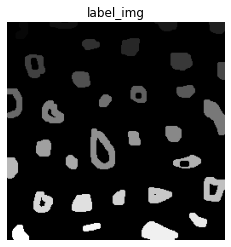

In [35]:
label_img = labeling_breadthSearch(thresh_img)

2. Saída da segunda imagem:

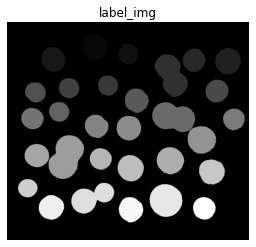

In [43]:
label_img2 = labeling_breadthSearch(thresh_img2)

3. Saída da terceira imagem:

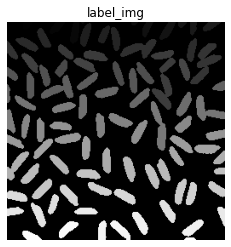

In [44]:
label_img3 = labeling_breadthSearch(thresh_img3)

## Letra E:

<b>Objetivo:</b> Utilizar o histograma da imagem obtida no item 3 para exibir na tela a área em pixels de cada objeto encontrado (exceto o fundo).

Um histograma é gerado através da variável <i>img_ravel</i>. Somente valores a partir do valor 1 é contabilizado, caso
ao contrário, seria contado também os pixels com valor 0. Ao final faz-se a impressão de um array contendo a quantidade
de pixels de cada objeto.

In [45]:
def generate_histogram(img):
    img_ravel = np.ravel(img)
    ir = np.where(img_ravel > 0)
    
    histogram = plt.hist(img_ravel[ir], 256, [0, 256])
    
    arr_pixelsObjects = histogram[0]
    ap = np.where(arr_pixelsObjects > 0)
    
    plt.title('Histogram'), plt.show()
    print("Area of objects in number of pixels:"), print(arr_pixelsObjects[ap])

Saida:

In label_img:



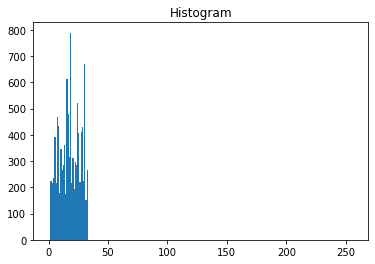

Area of objects in number of pixels:
[225. 224. 217. 235. 391. 215. 467. 434. 177. 347. 267. 286. 363. 175.
 613. 481. 315. 789. 218. 312. 193. 297. 284. 521. 406. 221. 411. 428.
 225. 669. 153. 265.]

In label_img2:



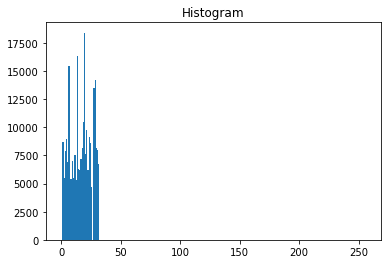

Area of objects in number of pixels:
[8.7060e+03 5.4640e+03 7.8770e+03 8.9670e+03 6.9580e+03 1.5472e+04
 5.4220e+03 5.4380e+03 7.0010e+03 5.5000e+03 7.5400e+03 5.2910e+03
 1.6337e+04 6.3150e+03 6.2250e+03 7.1480e+03 8.1470e+03 1.0478e+04
 1.8422e+04 7.6100e+03 9.7650e+03 6.2490e+03 9.1290e+03 8.6490e+03
 4.7340e+03 7.0000e+00 1.3526e+04 1.4238e+04 8.1620e+03 7.9880e+03
 6.7310e+03]

In label_img3:



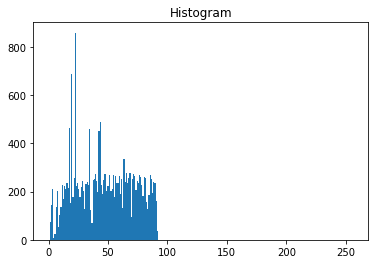

Area of objects in number of pixels:
[ 72. 145. 211.   6.  25. 134. 203.  52. 104. 135. 227. 170. 222. 211.
 234. 216. 462. 153. 687. 178. 256. 859. 225. 235. 210. 179. 220. 245.
 204. 129. 233. 240. 229. 459. 125.  69. 249. 252. 272. 245. 198. 451.
 487. 226. 189. 248. 272. 201. 223. 222. 270. 203. 209. 270. 176. 263.
 235. 237. 266. 190. 253. 133. 335. 239. 279. 236. 256. 276.  93. 251.
 271. 265. 208. 245. 236. 269. 261. 227. 181. 259. 257. 156. 127. 186.
 269. 252. 193. 241. 235. 161.  36.]


(None, None)

In [47]:
print("In label_img:\n"), generate_histogram(label_img)
print("\nIn label_img2:\n"), generate_histogram(label_img2)
print("\nIn label_img3:\n"), generate_histogram(label_img3)